Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


c:\Users\surej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\surej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\surej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 92s 314ms/step - accuracy: 0.2457 - loss: 1.8099 - val_accuracy: 0.2549 - val_loss: 1.7878
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 113s 392ms/step - accuracy: 0.3391 - loss: 1.6614 - val_accuracy: 0.2657 - val_loss: 1.7036
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 125s 432ms/step - accuracy: 0.4014 - loss: 1.5421 - val_accuracy: 0.4337 - val_loss: 1.4807
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 88s 307ms/step - accuracy: 0.4415 - loss: 1.4567 - val_accuracy: 0.4418 - val_loss: 1.4438
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 88s 305ms/step - accuracy: 0.4585 - loss: 1.4120 - val_accuracy: 0.4259 - val_loss: 1.5423
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 88s 305ms/step - accuracy: 0.4734 - loss: 1.3764 - val_accuracy: 0.5007 - val_loss: 1.3051
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 87s 304ms/step - accuracy: 0.4938 - loss: 1.3256 - val_accuracy: 0.5045 - val_loss: 1.2786
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 88s 307ms/step - accuracy: 0.5044

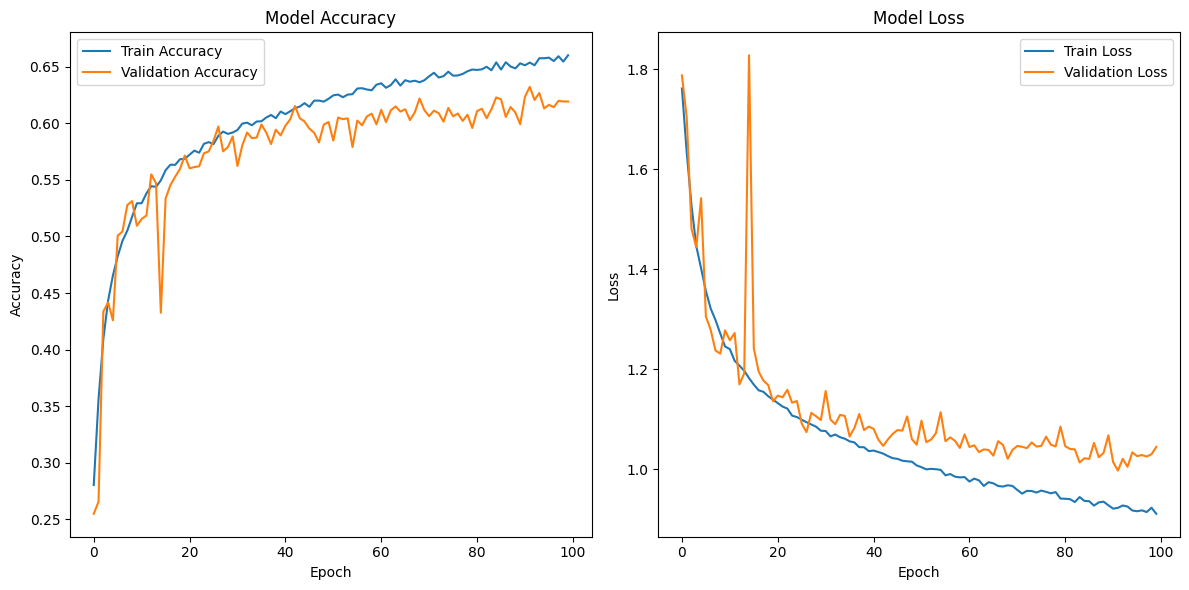

Model saved as model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.6130 - loss: 1.0548
Test accuracy: 0.6171635389328003
Test loss: 1.0466300249099731


In [ ]:
# Emotion Recognition Using CNN Model with TensorFlow
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

batch_size = 100
epochs = 100
image_size = (100, 100)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    r"C:\Users\surej\OneDrive\Desktop\project\assignment project\train",
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    r"C:\Users\surej\OneDrive\Desktop\project\assignment project\test",
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(32),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('model.h5')
print('Model saved as model.h5')

score = model.evaluate(test_generator)
print('Test accuracy:', score[1])
print('Test loss:', score[0])


In [ ]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

@st.cache_resource
def load_emotion_model():
    model_path = r"C:\Users\surej\OneDrive\Desktop\project\assignment project\model.h5"
    return load_model(model_path)

mp_face_detection = mp.solutions.face_detection.FaceDetection()

def process_image(uploaded_image, model):
    # Convert uploaded file to a CV2-readable format
    file_bytes = np.asarray(bytearray(uploaded_image.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Detect faces using MediaPipe
    results = mp_face_detection.process(image_rgb)
    if not results.detections:
        st.warning("No face was detected. Please upload another image.")
        return None
    
    for detection in results.detections:
        bboxC = detection.location_data.relative_bounding_box
        ih, iw, _ = image.shape
        x, y, w, h = (bboxC.xmin * iw, bboxC.ymin * ih, bboxC.width * iw, bboxC.height * ih)
        x, y, w, h = max(0, int(x)), max(0, int(y)), max(0, int(w)), max(0, int(h))
        face = image[y:y + h, x:x + w]
        
        if face.size == 0:
            st.warning("Failed to process the detected face. Please try another image.")
            return None
        
        # Resize face to match the input size of the CNN model
        face_resized = cv2.resize(face, (100, 100))
        face_gray = cv2.cvtColor(face_resized, cv2.COLOR_BGR2GRAY)
        face_array = img_to_array(face_gray) / 255.0
        face_array = np.expand_dims(face_array, axis=0)
        face_array = np.expand_dims(face_array, axis=-1)  
        
        # Predict emotion
        emotion_prediction = model.predict(face_array)
        emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
        emotion = emotion_labels[np.argmax(emotion_prediction)]
        return emotion

st.title("Emotion Detection from Uploaded Images")
st.markdown("Upload an image, and the application will detect and classify the emotion.")

uploaded_file = st.file_uploader("Upload an image file", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    model = load_emotion_model()
    emotion = process_image(uploaded_file, model)
    if emotion:
        st.success(f"Detected Emotion: {emotion}")


Overwriting app.py


In [ ]:
!streamlit run app.py

^C


: 

In [65]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, ResNet50, InceptionV3
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

batch_size = 100
epochs = 10
image_size = (224, 224)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    r"C:\Users\surej\OneDrive\Desktop\project\assignment project\train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    r"C:\Users\surej\OneDrive\Desktop\project\assignment project\test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

models = {
    "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
}

for model_name, base_model in models.items():
    if model_name == "InceptionV3":
        train_generator = datagen.flow_from_directory(
            r"C:\Users\surej\OneDrive\Desktop\project\assignment project\train",
            target_size=(299, 299),
            batch_size=batch_size,
            class_mode='categorical'
        )
        test_generator = datagen.flow_from_directory(
            r"C:\Users\surej\OneDrive\Desktop\project\assignment project\test",
            target_size=(299, 299),
            batch_size=batch_size,
            class_mode='categorical'
        )
    base_model.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(7, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)
    model.save(f'{model_name}_model.h5')
    score = model.evaluate(test_generator)
    print(f'{model_name} Test Accuracy:', score[1])
    print(f'{model_name} Test Loss:', score[0])


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step
Epoch 1/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.3286 - loss: 1.7030 - val_accuracy: 0.4048 - val_loss: 1.5279
Epoch 2/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.4130 - loss: 1.5165 - val_accuracy: 0.4253 - val_loss: 1.4866
Epoch 3/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step - accuracy: 0.4373 - loss: 1.4670 - val_accuracy: 0.4334 - val_loss: 1.4675
Epoch 4/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.4445 - loss: 1.4481 - val_accuracy: 0.4492 - val_loss: 1.4415
Epoch 5/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.4504 - loss: 1.4284 - val_accuracy: 0.4386 - val_loss: 1.4453
Epoch 6/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - accuracy: 0.4606 - loss: 1.4059 - val_accuracy: 0.4501 - val_l

72/72 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.4521 - loss: 1.4183
MobileNetV2 Test Accuracy: 0.4577876925468445
MobileNetV2 Test Loss: 1.4184439182281494
Epoch 1/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1449s 5s/step - accuracy: 0.2275 - loss: 1.8344 - val_accuracy: 0.2474 - val_loss: 1.8223
Epoch 2/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1457s 5s/step - accuracy: 0.2564 - loss: 1.8010 - val_accuracy: 0.2542 - val_loss: 1.7908
Epoch 3/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1443s 5s/step - accuracy: 0.2559 - loss: 1.7908 - val_accuracy: 0.2666 - val_loss: 1.7762
Epoch 4/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1378s 5s/step - accuracy: 0.2659 - loss: 1.7743 - val_accuracy: 0.2777 - val_loss: 1.7695
Epoch 5/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1342s 5s/step - accuracy: 0.2679 - loss: 1.7693 - val_accuracy: 0.2867 - val_loss: 1.7545
Epoch 6/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1340s 5s/step - accuracy: 0.2739 - loss: 1.7602 - val_accuracy: 0.2463 - val_loss: 1.7794
Epoch 7/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1313s 5s/step - ac

72/72 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.2959 - loss: 1.7143
ResNet50 Test Accuracy: 0.2897742986679077
ResNet50 Test Loss: 1.719986915588379
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1671s 6s/step - accuracy: 0.2951 - loss: 1.7510 - val_accuracy: 0.3486 - val_loss: 1.6359
Epoch 2/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1681s 6s/step - accuracy: 0.3813 - loss: 1.5884 - val_accuracy: 0.3976 - val_loss: 1.5543
Epoch 3/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1676s 6s/step - accuracy: 0.3962 - loss: 1.5548 - val_accuracy: 0.3996 - val_loss: 1.5516
Epoch 4/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1698s 6s/step - accuracy: 0.4055 - loss: 1.5247 - val_accuracy: 0.4121 - val_loss: 1.5227
Epoch 5/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1699s 6s/step - accuracy: 0.4216 - loss: 1.5022 - val_accuracy: 0.3991 - val_loss: 1.5181
Epoch 6/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1723s 6s/step - accuracy: 0.4250 - loss: 1.4929 - val_accuracy: 0.4081

72/72 ━━━━━━━━━━━━━━━━━━━━ 361s 5s/step - accuracy: 0.4243 - loss: 1.4861
InceptionV3 Test Accuracy: 0.4296461343765259
InceptionV3 Test Loss: 1.4784672260284424
